# LPHYS1303 Simulation Numérique pour la Physique : Projet 1 - Soliton
--- 
## Auteurs : Augustin Basilavechia, Amaury Laridon
---


## Question 1 : Schéma Upwind

### Condition Initiale $cos(\pi x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
def f_cos(x_grid):
    """fonction initiale de cos"""
    N = x_grid.size
    U0 = np.zeros(N)
    for i in range(N):
        U0[i] = np.cos(np.pi*x_grid[i])
    return(U0)

x_L = 0.0
x_R = 2.0
L = x_R - x_L
h = 0.01
N = L/h
N = int(N)
x_grid = np.linspace(x_L, x_R - h, N)
print("Résolution numérique avec une grille spatiale de {} points".format(N))
t_0 = 0
T = 1.5
k = 0.00001
M = T/k
M = int(M)
t_grid = np.linspace(t_0, T-k, M)
print("Résolution numérique avec une grille temporelle de {} points".format(M))
delta = 0.022
print("Paramètres numérique : L = {}, T = {}s, h = {}, k = {}, delta = {}".format(L, T, h, k, delta))


def Upwind_KdV(U0, x_grid, t_grid, T, delta):
    """Schéma Upwind pour l équation de KdV"""
    h = np.abs(x_grid[1]-x_grid[0])
    k = np.abs(t_grid[1]-x_grid[0])
    U = np.zeros((np.shape(x_grid)[0], np.shape(t_grid)[0]), dtype=np.float64)
    M = np.shape(t_grid)[0]
    U[:, 0] = U0
    for j in range(M-1):
        # Implémentation schéma
        U[2:-2, j+1] = U[2:-2, j]-(k/h)*(U[2:-2, j]-U[1:-3, j])*U[2:-2, j]-((delta**2)*k/(2*(h)**3))*(U[4:, j]-2*U[3:-1, j]
        +2*U[1:-3, j]-U[0:-4, j])
        # Conditions aux bords
        U[0, j+1] = 0
        U[1, j+1] = 0
        U[-2, j+1] = 0
        U[-1, j+1] = 0
        #U[0,:] = U[-1,:]
        #U[1,:] = U[-2,:]    #Tentative d'implémenter des conditions aux bords périodiques cfr plus bas mais ça ne change rien
    return U

#Initialisiation
U0 = f_cos(x_grid)
Upwind = Upwind_KdV(U0, x_grid, t_grid, T, delta)
print(np.shape(Upwind))
print(Upwind)


Résolution numérique avec une grille spatiale de 200 points
Résolution numérique avec une grille temporelle de 150000 points
Paramètres numérique : L = 2.0, T = 1.5s, h = 0.01, k = 1e-05, delta = 0.022


<ipython-input-2-79bde94ef316>:37: RuntimeWarning: overflow encountered in multiply
  U[2:-2, j+1] = U[2:-2, j]-(k/h)*(U[2:-2, j]-U[1:-3, j])*U[2:-2, j]-((delta**2)*k/(2*(h)**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-2-79bde94ef316>:37: RuntimeWarning: invalid value encountered in subtract
  U[2:-2, j+1] = U[2:-2, j]-(k/h)*(U[2:-2, j]-U[1:-3, j])*U[2:-2, j]-((delta**2)*k/(2*(h)**3))*(U[4:, j]-2*U[3:-1, j]


(200, 150000)
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.99950656 0.         0.         ... 0.         0.         0.        ]
 [0.99802673 0.9980282  0.99944974 ...        nan        nan        nan]
 ...
 [0.99556196 0.99555855 0.99314349 ...        nan        nan        nan]
 [0.99802673 0.         0.         ... 0.         0.         0.        ]
 [0.99950656 0.         0.         ... 0.         0.         0.        ]]


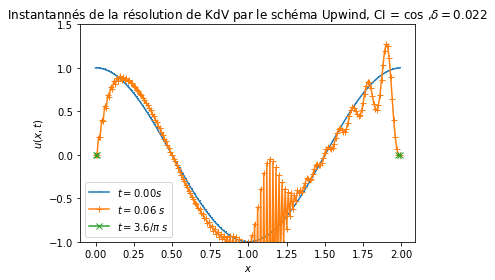

In [3]:
#Plot d'instantanné avec la CI de cos()
t_span = [0, 1/np.pi, 3.6/np.pi]
n0 = 0
plt.plot(x_grid, Upwind[:, n0], label="$t = {:2.2f}s$".format(t_grid[n0]), marker=',')
n1 = int(np.floor(t_span[1]/k))
t1 = 6000*k
plt.plot(x_grid, Upwind[:, 6000], label="$t = {:2.2f} \;s$".format(t1), marker='+')
#Je veux plot au même temps de référence que ceux de l'article mais je ne sais pas pourquoi je n'ai plus aucune valeur
#pour des temps plus grand que 0.06s, je suspecte les 'nan' qui apparaissent trop vite dans le matrice U comme étant
#l'origine du problème mais j'ai beau avoir relu toute mon implémentation je ne trouve pas l'erreur :/ En attendant j'ai plot_surface
#pour t = 0.06s et là le résultat semble cohérent avec ce qu'ils ont dans l'article pour leur premier temps.
#Update: dans l'article ils parlent de conditions aux bords périodiques or ici je suis pas sûr de les implémenter, peut-être le soucis
#vient de là ? Si oui je ne comprend pas comment les rajouter ??
n2 = int(np.floor(t_span[2]/k))
plt.plot(x_grid, Upwind[:, n2], label="$t = 3.6/ \pi \; s$", marker='x')
# plt.plot(uu[:, n], label="Theorical Solution $t = {:2.2f}s$".format(t[n]))
plt.ylim([-1, 1.5])
plt.xlabel("$x$")
plt.ylabel("$u(x,t)$")
plt.title('Instantannés de la résolution de KdV par le schéma Upwind, CI = cos ,$\delta = {}$'.format(delta))
plt.legend()
plt.show()
plt.close()

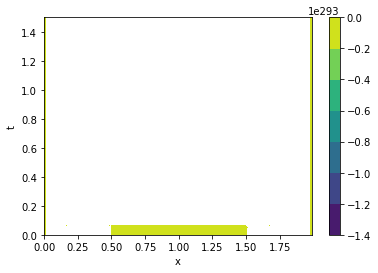

In [4]:
#Plot 2D
[xx,tt]=np.meshgrid(x_grid,t_grid)
a = plt.contourf(xx,tt, Upwind.T)
plt.xlabel("x")
plt.ylabel("t")
#Si je vais tourner pour afficher ça, ça fait planter mon ordi ^^ en prenant T = 5s, pour T=1.5s ça plante plus
#mais le graphe n'est pas bon.
plt.colorbar(a)
plt.show()

### Condition initiale $sech^2$

In [5]:
######Condition initiale de sech^2#####
def f_sech(x_grid):
    """fonction initiale de sech^2"""
    N = x_grid.size
    U0 = np.zeros(N)
    k = 1/np.sqrt(2)
    A = 2*(k**2)
    for i in range(N):
        U0[i] = A*(1/np.cosh(k*x_grid[i]))**2
    return(U0)

h = 0.1739
k = 0.00001
x_L = -20
x_R = 20
L = x_R - x_L
N = L/h
N = int(N)
x_grid = np.linspace(x_L, x_R - h, N)
print("Résolution numérique avec une grille spatiale de {} points".format(N))
t_0 = 0
T = 2
M = T/k
M = int(M)
t_grid = np.linspace(t_0, T-k, M)
print("Résolution numérique avec une grille temporelle de {} points".format(M))
delta = 0.022
print("Paramètres numérique : L = {}, T = {}s, h = {}, k = {}, delta = {}".format(L, T, h, k, delta))

#Initialisiation
U0 = f_sech(x_grid)
Upwind = Upwind_KdV(U0, x_grid, t_grid, T, delta)
print(np.shape(Upwind))
print(Upwind)

Résolution numérique avec une grille spatiale de 230 points
Résolution numérique avec une grille temporelle de 199999 points
Paramètres numérique : L = 40, T = 2s, h = 0.1739, k = 1e-05, delta = 0.022


<ipython-input-2-79bde94ef316>:37: RuntimeWarning: overflow encountered in multiply
  U[2:-2, j+1] = U[2:-2, j]-(k/h)*(U[2:-2, j]-U[1:-3, j])*U[2:-2, j]-((delta**2)*k/(2*(h)**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-2-79bde94ef316>:37: RuntimeWarning: invalid value encountered in subtract
  U[2:-2, j+1] = U[2:-2, j]-(k/h)*(U[2:-2, j]-U[1:-3, j])*U[2:-2, j]-((delta**2)*k/(2*(h)**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-2-79bde94ef316>:37: RuntimeWarning: invalid value encountered in add
  U[2:-2, j+1] = U[2:-2, j]-(k/h)*(U[2:-2, j]-U[1:-3, j])*U[2:-2, j]-((delta**2)*k/(2*(h)**3))*(U[4:, j]-2*U[3:-1, j]


(230, 199999)
[[2.08140725e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.66177846e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.40397804e-12 3.30936191e-12 6.11765124e-12 ...            nan
             nan            nan]
 ...
 [4.35304891e-12 4.47404519e-12 6.77418007e-13 ...            nan
             nan            nan]
 [3.40391498e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.66172915e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


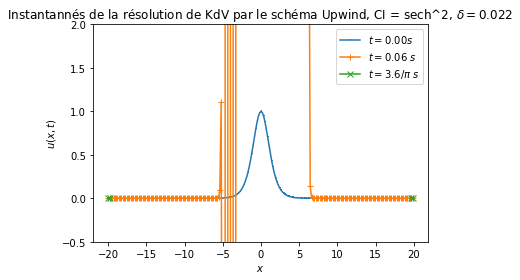

In [6]:

#Plot d'instantanné avec la CI de cos()
t_span = [0, 1/np.pi, 3.6/np.pi]
n0 = 0
plt.plot(x_grid, Upwind[:, n0], label="$t = {:2.2f}s$".format(t_grid[n0]), marker=',')
n1 = int(np.floor(t_span[1]/k))
t1 = 6000*k
plt.plot(x_grid, Upwind[:, 10], label="$t = {:2.2f} \;s$".format(t1), marker='+')
n2 = int(np.floor(t_span[2]/k))
plt.plot(x_grid, Upwind[:, n2], label="$t = 3.6/ \pi \; s$", marker='x')
# plt.plot(uu[:, n], label="Theorical Solution $t = {:2.2f}s$".format(t[n]))
#Même problème qu'au dessus le schéma est (dans l'état actuel de son implémentation) n'est pas du tout stable et je n'ai pas de
#pour leurs temps de référence. Pour des instants 10**-4s après le début on voit déjà que ça part en couille.
plt.ylim([-0.5, 2])
plt.xlabel("$x$")
plt.ylabel("$u(x,t)$")
plt.title('Instantannés de la résolution de KdV par le schéma Upwind, CI = sech^2, $\delta = {}$'.format(delta))
plt.legend()
plt.show()
plt.close()

---
## Question 2 : Schéma de Zabusky et Kruskal
---

### Condition initiale $cos(\pi x)$

Résolution numérique avec une grille spatiale de 200 points
Résolution numérique avec une grille temporelle de 150000 points
Paramètres numérique : L = 2, T = 1.5s, h = 0.01, k = 1e-05, delta = 0.022


<ipython-input-7-d657084fcfa4>:29: RuntimeWarning: overflow encountered in multiply
  U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-7-d657084fcfa4>:29: RuntimeWarning: invalid value encountered in add
  U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-7-d657084fcfa4>:29: RuntimeWarning: invalid value encountered in subtract
  U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]


(200, 150000)
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.99506560e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.98026728e-01  3.91667561e-06  9.98026747e-01 ...             nan
              nan             nan]
 ...
 [ 9.95561965e-01 -5.85561437e-06  9.95561993e-01 ...             nan
              nan             nan]
 [ 9.98026728e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.99506560e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


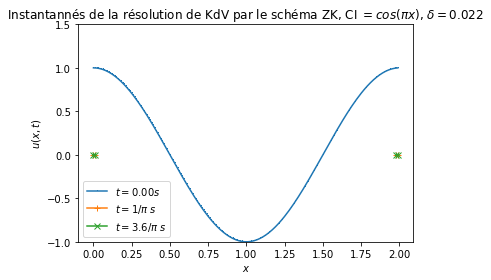

In [7]:
#Paramètres numériques et physiques.
h = 0.01
k = 0.00001
x_L = 0
x_R = 2
L = x_R - x_L
N = L/h
N = int(N)
x_grid = np.linspace(x_L, x_R - h, N)
print("Résolution numérique avec une grille spatiale de {} points".format(N))
t_0 = 0
T = 1.5
M = T/k
M = int(M)
t_grid = np.linspace(t_0, T-k, M)
print("Résolution numérique avec une grille temporelle de {} points".format(M))
delta = 0.022
print("Paramètres numérique : L = {}, T = {}s, h = {}, k = {}, delta = {}".format(L, T, h, k, delta))

def ZK_KdV(U0, x_grid, t_grid, T, delta):
    """Schéma ZK pour l équation de KdV"""
    h = np.abs(x_grid[1]-x_grid[0])
    k = np.abs(t_grid[1]-x_grid[0])
    U = np.zeros((np.shape(x_grid)[0], np.shape(t_grid)[0]), dtype=np.float64)
    M = np.shape(t_grid)[0]
    U[:, 0] = U0
    for j in range(M-1):
        # Implémentation schéma
        U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]
        +2*U[1:-3, j]-U[0:-4, j])
        # Conditions aux bords
        U[0, j+1] = 0
        U[1, j+1] = 0
        U[-2, j+1] = 0
        U[-1, j+1] = 0
        #U[0,:] = U[-1,:]
        #U[1,:] = U[-2,:]    #Tentative d'implémenter des conditions aux bords périodiques cfr plus bas mais ça ne change rien
    return U

#Initialisiation
U0 = f_cos(x_grid)
ZK = ZK_KdV(U0, x_grid, t_grid, T, delta)
print(np.shape(ZK))
print(ZK)

#Plot d'instantanné avec la CI de cos
t_span = [0, 1/np.pi, 3.6/np.pi]
n0 = 0
plt.plot(x_grid, ZK[:, n0], label="$t = {:2.2f}s$".format(t_grid[n0]), marker=',')
n1 = int(np.floor(t_span[1]/k))
plt.plot(x_grid, ZK[:, n1], label="$t = 1/ \pi \;s$", marker='+')
n2 = int(np.floor(t_span[2]/k))
plt.plot(x_grid, ZK[:, n2], label="$t = 3.6/ \pi \; s$", marker='x')
# plt.plot(uu[:, n], label="Theorical Solution $t = {:2.2f}s$".format(t[n]))
#Même problème qu'au dessus le schéma est (dans l'état actuel de son implémentation) n'est pas du tout stable et je n'ai pas de
#pour leurs temps de référence. Pour des instants 10**-4s après le début on voit déjà que ça part en couille.
plt.ylim([-1, 1.5])
plt.xlabel("$x$")
plt.ylabel("$u(x,t)$")
plt.title('Instantannés de la résolution de KdV par le schéma ZK, CI $= cos(\pi x)$, $\delta = {}$'.format(delta))
plt.legend()
plt.show()
plt.close()

### Condition initiale de $sech^2$

Résolution numérique avec une grille spatiale de 800 points
Résolution numérique avec une grille temporelle de 27500 points
Paramètres numérique : L = 40, T = 1.1s, h = 0.05, k = 4e-05, delta = 0.022


<ipython-input-7-d657084fcfa4>:29: RuntimeWarning: overflow encountered in multiply
  U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-7-d657084fcfa4>:29: RuntimeWarning: invalid value encountered in add
  U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-7-d657084fcfa4>:29: RuntimeWarning: invalid value encountered in subtract
  U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]
<ipython-input-7-d657084fcfa4>:29: RuntimeWarning: overflow encountered in add
  U[2:-2, j+1] = U[2:-2, j-1]-(1/3)*(k/h)*(U[3:-1, j]+U[2:-2, j]+U[1:-3,j])*(U[3:-1, j]-U[1:-3,j])-((delta**2)*k/(h**3))*(U[4:, j]-2*U[3:-1, j]


(800, 27500)
[[ 2.08140725e-12  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.23391334e-12  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.39759364e-12 -1.31452725e-13 -7.72747504e-12 ...             nan
              nan             nan]
 ...
 [ 2.57326691e-12  1.41084353e-13 -8.29367224e-12 ...             nan
              nan             nan]
 [ 2.39759364e-12  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.23391334e-12  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


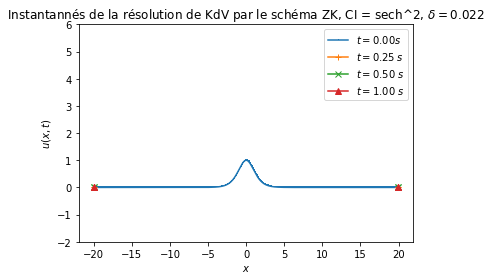

In [8]:
h = 0.05
k = 0.00004
x_L = -20
x_R = 20
L = x_R - x_L
N = L/h
N = int(N)
x_grid = np.linspace(x_L, x_R - h, N)
print("Résolution numérique avec une grille spatiale de {} points".format(N))
t_0 = 0
T = 1.1
M = T/k
M = int(M)
t_grid = np.linspace(t_0, T-k, M)
print("Résolution numérique avec une grille temporelle de {} points".format(M))
delta = 0.022
print("Paramètres numérique : L = {}, T = {}s, h = {}, k = {}, delta = {}".format(L, T, h, k, delta))

#Initialisiation
U0 = f_sech(x_grid)
ZK = ZK_KdV(U0, x_grid, t_grid, T, delta)
print(np.shape(ZK))
print(ZK)

#Plot d'instantanné avec la CI de sech^2
M_span = [0, 0.25/k, 0.5/k,1.0/k]
m0 = 0
t0 = 0
plt.plot(x_grid, ZK[:, m0], label="$t = {:2.2f}s$".format(t0), marker=',')
m1 = int(np.floor(M_span[1]))
t1 = m1*k
plt.plot(x_grid, ZK[:, m1], label="$t = {:2.2f} \;s$".format(t1), marker='+')
m2 = int(np.floor(M_span[2]))
t2 = m2*k
plt.plot(x_grid, ZK[:, m2], label="$t = {:2.2f}\; s$".format(t2), marker='x')
m3 = int(np.floor(M_span[3]))
t3 = m3*k
plt.plot(x_grid, ZK[:, m3], label="$t = {:2.2f}\; s$".format(t3), marker='^')
# plt.plot(uu[:, n], label="Theorical Solution $t = {:2.2f}s$".format(t[n]))
#Même problème qu'au dessus le schéma est (dans l'état actuel de son implémentation) n'est pas du tout stable et je n'ai pas de
#pour leurs temps de référence. Pour des instants 10**-4s après le début on voit déjà que ça part en couille.
plt.ylim([-2,6])
plt.xlabel("$x$")
plt.ylabel("$u(x,t)$")
plt.title('Instantannés de la résolution de KdV par le schéma ZK, CI = sech^2, $\delta = {}$'.format(delta))
plt.legend()
plt.show()
plt.close()
